## **0.1. install ltspice**

In [ ]:
!pip install ltspice


## **1.1. import modules**

In [ ]:
import ltspice
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import animation,rc
import time

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive



## **1.2. import data**

In [ ]:
#filepath = '/content/drive/MyDrive/Class/ODE/水電工/LTSPICE/Init_Model_Op.raw'
filepath = '/content/drive/MyDrive/Class/ODE/水電工/LTSPICE/Init_Model_Op_ALL_Var.raw'
l = ltspice.Ltspice(filepath)
l.parse()


## **1.3. initialize some setting**

In [ ]:
c1 = '#AAAAAA'
bgc = '#262626'
labc = '#CCCCCC'
clr = ['#88C1E0','#F0CB10','#D96B77','#4AD29E']

plt.rc('font', size = 15)          # ctrl plot default txt sizes
plt.rcParams['text.color'] = c1
plt.rcParams['xtick.color'] = c1
plt.rcParams['ytick.color'] = c1
plt.rcParams['axes.labelcolor'] = c1
plt.rcParams['axes.edgecolor'] = c1
plt.rcParams['axes.facecolor'] = bgc
plt.rcParams['figure.facecolor'] = bgc
plt.rcParams['patch.facecolor'] = bgc
plt.rcParams['savefig.facecolor'] = bgc
plt.rcParams['animation.html'] = 'jshtml'

plt.figure(figsize=(8,6), dpi=300)

<Figure size 2400x1800 with 0 Axes>

<Figure size 2400x1800 with 0 Axes>


## **2.1. setting variables**
a.using l.getTime() to get time <br>
b.using l.getData() to get the data from .raw file

In [ ]:
time = l.getTime()
V_n  = l.getData('V(op-in)')
V_p  = l.getData('V(V+)')
V_o  = l.getData('V(op-out)')
V_out = l.getData('V(out)')
I_led = l.getData('I(led)')
I_C  = l.getData('I(C1)')
t_max = 30

plot the fig

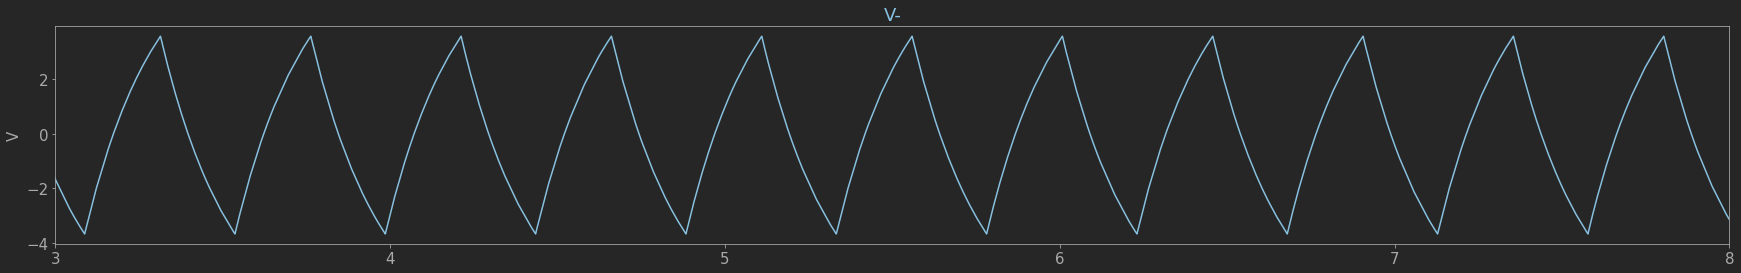

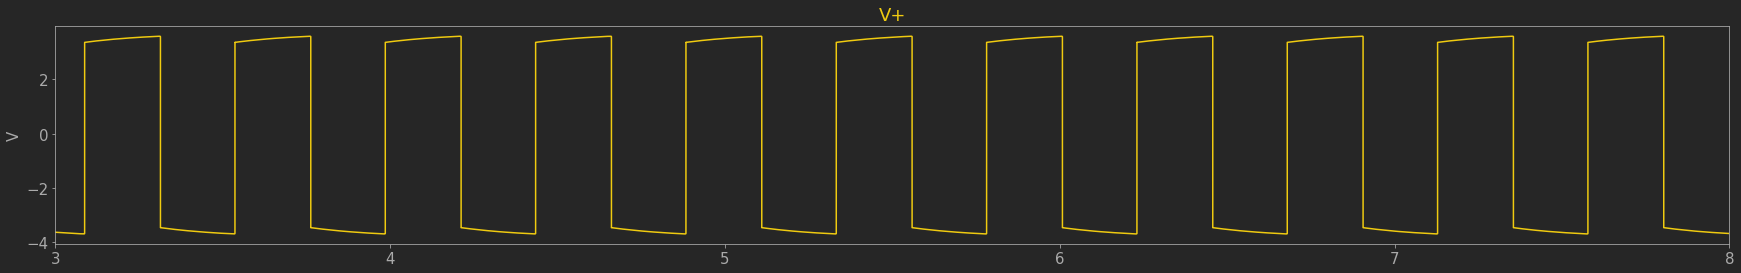

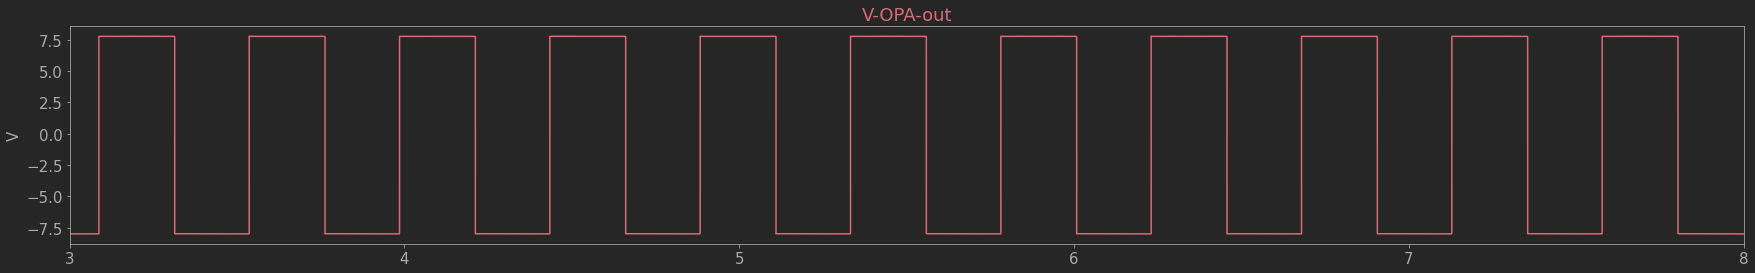

In [ ]:
#V-
plt.xlim(3,8)
plt.plot(time, V_n,color=clr[0])
plt.title('V-',color=clr[0])
plt.ylabel('V')
plt.show()

#V+
plt.xlim(3,8)
plt.plot(time, V_p,color=clr[1])
plt.title('V+',color=clr[1])
plt.ylabel('V')
plt.show()

#V-OPA-O
plt.xlim(3,8)
plt.plot(time, V_o,color=clr[2])
plt.title('V-OPA-out',color=clr[2])
plt.ylabel('V')
plt.show()

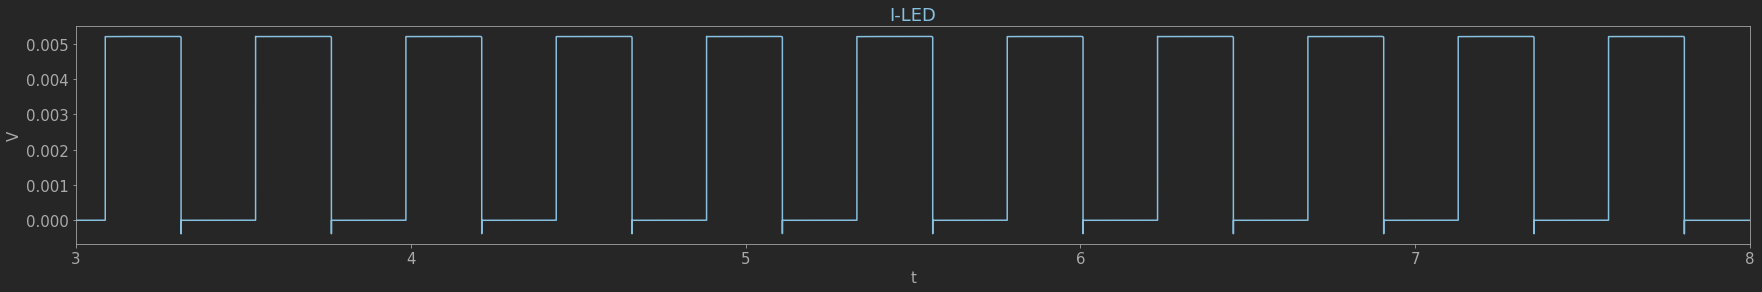

In [ ]:
#I-LED
plt.xlim(3,8)
plt.plot(time, I_led,color=clr[0])
plt.title('I-LED',color=clr[0])
plt.xlabel('t')
plt.ylabel('V')
plt.show()

## **------ things above are what we googled ------**


figuring out the data types and dimensions

In [ ]:
print(type(time))
print(type(V_out))
print(type(I_led))
print(time.shape)
print(V_out.shape)
print(I_led.shape)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(8574,)
(8574,)
(8574,)


figuring out the time interval

In [ ]:
for i in time:
  print(i)

## **Problem: sample rate is not constant**<br>
so we need to sampling again

In [ ]:
count=0
itv=0.05
t = np.array(np.arange(0,t_max,itv))
print(t)
print(t.size)

In [ ]:
#empty lists
_V_n  = []
_V_p  = []
_V_o  = []
_V_out = []
_I_led = []
_I_C  = []

#init
j = 0
max_step=int(t.size)
count=0
step=0
#sampling
for i in time:
  if(i>=j):
    #append
    _V_n.append(float(V_n[count]))
    _V_p.append(float(V_p[count]))
    _V_o.append(float(V_o[count]))
    _V_out.append(float(V_out[count]))
    _I_led.append(1000*float(I_led[count]))
    _I_C.append(1000*float(I_C[count]))
    j+=itv
    step+=1
  count+=1
  if (step>max_step):
    break

In [ ]:
#list 2 ndarray
V_n_  = np.array(_V_n)
V_p_  = np.array(_V_p)
V_o_  = np.array(_V_o)
V_out_ = np.array(_V_out)
I_led_ = np.array(_I_led)
I_C_  = np.array(_I_C)

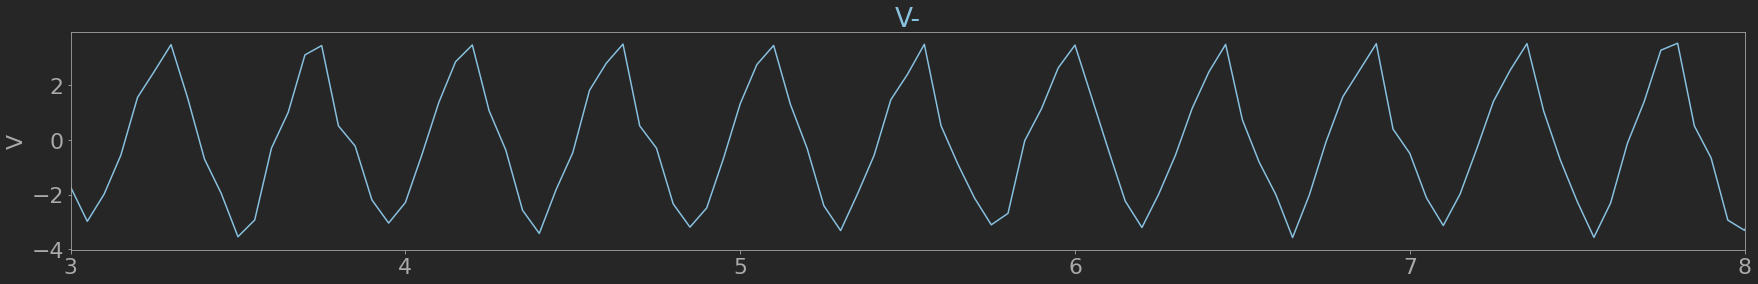

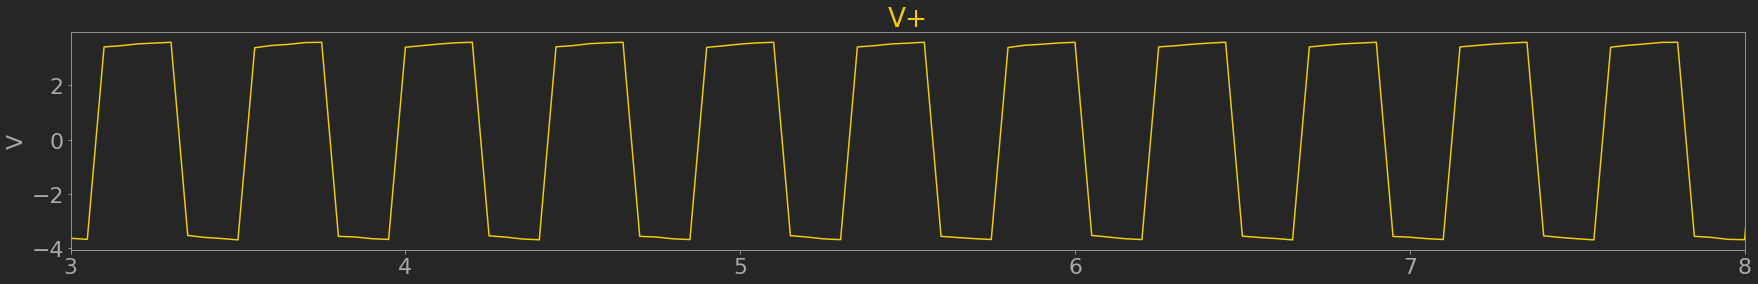

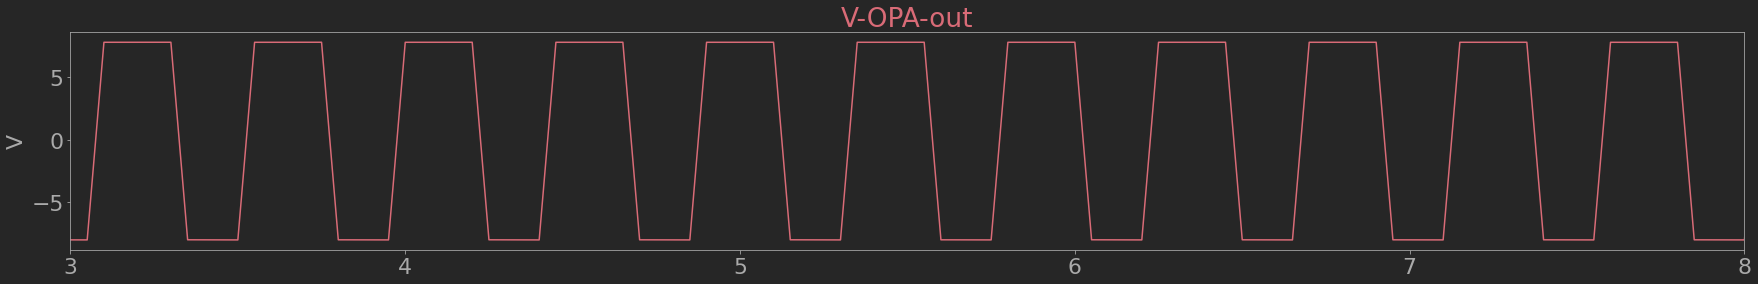

In [ ]:
#V-
plt.xlim(3,8)
plt.plot(t,V_n_,color=clr[0])
plt.title('V-',color=clr[0])
plt.ylabel('V')
plt.show()

#V+
plt.xlim(3,8)
plt.plot(t,V_p_,color=clr[1])
plt.title('V+',color=clr[1])
plt.ylabel('V')
plt.show()

#V-OPA-O
plt.xlim(3,8)
plt.plot(t,V_o_,color=clr[2])
plt.title('V-OPA-out',color=clr[2])
plt.ylabel('V')
plt.show()

# **-------ANIMATION!!!!--------**

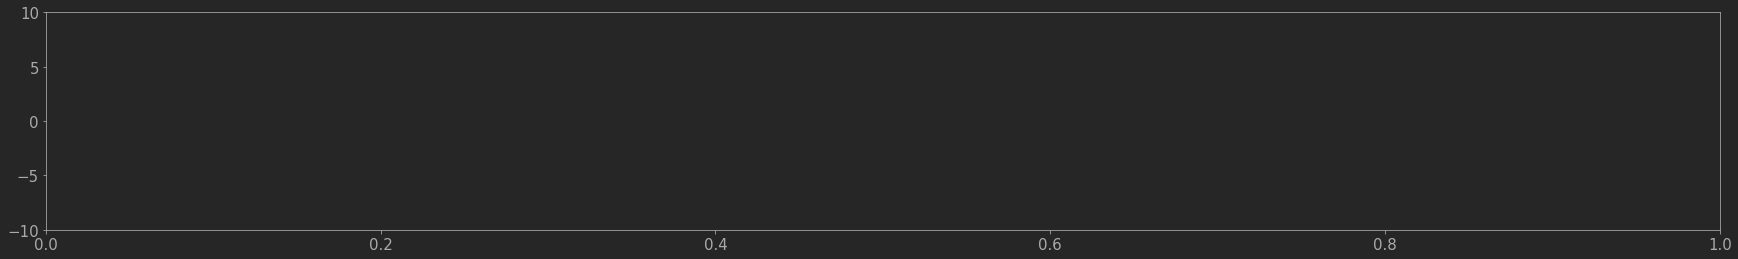

In [ ]:
terms = 4

Tags = ['V+', 'V-', 'V-OPA','I-LED']
Data = np.array([V_n_,V_p_,V_o_,I_led_])

font = {
    'weight': 'normal',
    'size'  :  30,
    'color': 'lightgray'
}

fig, axes = plt.subplots(nrows=1,ncols=1,figsize=(10,10))
plt.ylim(-10,10)

def update(j):
  plt.cla()
  plt.ylim(-10,10)
  for i in range(0,terms):
    axes.bar(Tags[i],Data[i][j],align='center',color=clr[i])

ani=animation.FuncAnimation(fig, update ,interval=20)
writervideo = animation.FFMpegWriter(fps=20)
ani.save('/content/drive/MyDrive/Class/ODE/Ani.mp4', writer=writervideo,dpi = 300)
plt.close()
ani